## The notebook is modified from  [MorvanZhou/NLP-Tutorials/tf_idf_sklearn.py](https://github.com/MorvanZhou/NLP-Tutorials/blob/master/tf_idf_sklearn.py) 

### The notebook only deals with titles by using TF-IDF.

### You can check the [improved version](https://colab.research.google.com/drive/1R36EVWLJTfEbA6RjamQ5IkvDEvByKf5k?usp=sharing) which deals with both titles and abstracts by applying differernt weights.

In [ ]:
##library
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


### Download the dataset about APSMarch2021(url, title, authors, abstract)

### Or you can download from my github [NLP_APS_abstract](https://github.com/shijiale0609/NLP_APS_abstract)

In [ ]:
# get the abstract data of APSMarch2021
!wget https://github.com/shijiale0609/NLP_APS_abstract/raw/main/APSMarch2021.pkl


--2021-02-15 17:21:01--  https://github.com/shijiale0609/NLP_APS_abstract/raw/main/APSMarch2021.pkl
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shijiale0609/NLP_APS_abstract/main/APSMarch2021.pkl [following]
--2021-02-15 17:21:01--  https://raw.githubusercontent.com/shijiale0609/NLP_APS_abstract/main/APSMarch2021.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15725598 (15M) [application/octet-stream]
Saving to: ‘APSMarch2021.pkl.1’

APSMarch2021.pkl.1  100%[===================>]  15.00M  37.5MB/s    in 0.4s    

2021-02-15 17:21:02 (37.5 MB/s) - ‘APSMarch2021.pkl.1’ saved [15725598/1572

In [ ]:
# read the csv
df = pd.read_pickle('APSMarch2021.pkl')

In [ ]:
## get the titles for all the abstract. 
title_list = df['Title'].tolist()

In [ ]:
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(title_list)
print("idf: ", [(n, idf) for idf, n in zip(vectorizer.idf_, vectorizer.get_feature_names())])
print("v2i: ", vectorizer.vocabulary_)

idf:  [('000', 9.526648350186992), ('0001', 8.610357618312838), ('001', 7.275356551580497), ('00pm', 7.821900257948568), ('010', 9.121183242078828), ('0276', 9.526648350186992), ('09', 9.526648350186992), ('0fe1', 9.526648350186992), ('10', 8.428036061518883), ('100', 7.9172104377528925), ('10216', 9.526648350186992), ('10fff', 9.526648350186992), ('11', 9.121183242078828), ('110', 7.821900257948568), ('111', 6.961698992725456), ('113', 9.526648350186992), ('1144', 9.526648350186992), ('12', 9.121183242078828), ('122', 9.121183242078828), ('125cuo4', 9.121183242078828), ('125mno3', 9.526648350186992), ('125te', 9.526648350186992), ('129mxe', 9.526648350186992), ('12cuo4', 9.526648350186992), ('13', 9.121183242078828), ('130', 9.526648350186992), ('131mxe', 9.526648350186992), ('133mxe', 9.526648350186992), ('133xe', 9.526648350186992), ('135xe', 9.526648350186992), ('143', 9.526648350186992), ('150', 9.526648350186992), ('1550', 9.526648350186992), ('1651', 9.526648350186992), ('167er3

In [ ]:
q = "free energy calculation"
#q = "Colloidal Diamond Photonic Bands"
#q = "enhanced sampling"


qtf_idf = vectorizer.transform([q])

### get the cosine similarity between the input embedding vector and the titles' embedding vectors.
res = cosine_similarity(tf_idf, qtf_idf)

### sort the cosine similarity and get the top n titles' index
n = 5
res1 = res.ravel().argsort()[-n:]
res1 = res1.tolist()
res1.reverse()

print ("Top " + str(n), "titles for '{}':".format(q))
for i in range(0, len(res1)):
    print(i+1, "cosine similarity = ", res[res1[i]][0], '\n', "Title:",title_list[res1[i]], '\n', 'url:', df['url'][res1[i]])

Top 5 titles for 'free energy calculation':
1 cosine similarity =  0.6600732951469466 
 Title: Direct calculation of kinetics from free energy surfaces 
 url: https://meetings.aps.org/Meeting/MAR21/Session/P25.3
2 cosine similarity =  0.5565419883163054 
 Title: pgm: A Python package for free energy calculation 
 url: https://meetings.aps.org/Meeting/MAR21/Session/P19.3
3 cosine similarity =  0.365190743317765 
 Title: Optimizing Free Energy Estimation with Machine Learning 
 url: https://meetings.aps.org/Meeting/MAR21/Session/P22.5
4 cosine similarity =  0.3628498883412167 
 Title: Energy gap calculation on near-term quantum hardware with robust phase estimation 
 url: https://meetings.aps.org/Meeting/MAR21/Session/M32.12
5 cosine similarity =  0.33704845051339805 
 Title: Electric Field Energy and Potential Energy 
 url: https://meetings.aps.org/Meeting/MAR21/Session/C15.7


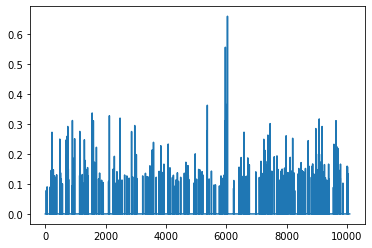

In [ ]:
import matplotlib.pyplot as plt
plt.plot(res)